### Model Training


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv('Algerian_forest_fires_dataset_Cleaned.csv')
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [4]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [5]:
df.drop(["day", "month","year"], axis=1, inplace=True)

In [6]:
df.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'Classes', 'Region'],
      dtype='object')

In [7]:
df["Classes"].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [8]:
# Encoding 
df["Classes"]=np.where(df["Classes"].str.contains("not fire"),0,1)

In [9]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [10]:
df.tail()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
239,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
240,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
241,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
242,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1
243,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0,1


In [11]:
df.Classes.value_counts()

Classes
1    137
0    107
Name: count, dtype: int64

In [12]:
X=df.drop("FWI", axis=1)    
Y=df["FWI"]

In [13]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [14]:
Y.head()

0    0.5
1    0.4
2    0.1
3    0.0
4    0.5
Name: FWI, dtype: float64

In [15]:
# Train and Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.25, random_state=45)
X_train.shape,X_test.shape

((183, 11), (61, 11))

In [16]:
# Feature Selection based on correlation
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.690479,-0.324198,-0.357882,0.684972,0.477102,0.350609,0.608502,0.444543,0.513525,0.309498
RH,-0.690479,1.000000,0.228944,0.250569,-0.675737,-0.435936,-0.238799,-0.724585,-0.375818,-0.457387,-0.432015
Ws,-0.324198,0.228944,1.000000,0.239092,-0.174093,0.002229,0.084417,-0.013656,0.036653,-0.093171,-0.174769
Rain,-0.357882,0.250569,0.239092,1.000000,-0.548253,-0.287327,-0.295886,-0.342437,-0.297902,-0.363386,-0.073956
FFMC,0.684972,-0.675737,-0.174093,-0.548253,1.000000,0.600047,0.500030,0.739878,0.587100,0.762029,0.217579
DMC,0.477102,-0.435936,0.002229,-0.287327,0.600047,1.000000,0.878992,0.682263,0.982134,0.564562,0.185447
DC,0.350609,-0.238799,0.084417,-0.295886,0.500030,0.878992,1.000000,0.497551,0.942581,0.473827,-0.102971
ISI,0.608502,-0.724585,-0.013656,-0.342437,0.739878,0.682263,0.497551,1.000000,0.640862,0.717520,0.283068
BUI,0.444543,-0.375818,0.036653,-0.297902,0.587100,0.982134,0.942581,0.640862,1.000000,0.562344,0.074911
Classes,0.513525,-0.457387,-0.093171,-0.363386,0.762029,0.564562,0.473827,0.717520,0.562344,1.000000,0.143014


<Axes: >

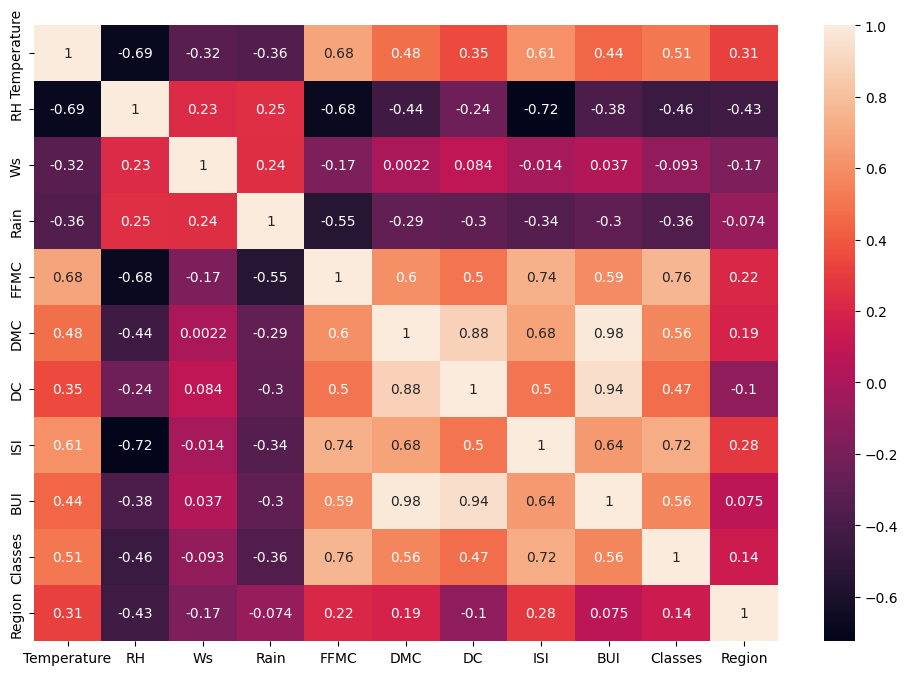

In [17]:
# Multicolinearity using Heatmap
plt.figure(figsize=(12,8))
sns.heatmap(X_train.corr(), annot=True)


In [18]:
def corelation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [19]:
# Correlation Features
corr_features=corelation(X_train,0.85)

In [20]:
# Drop the correlated features
X_train.drop(corr_features, axis=1, inplace=True)
X_test.drop(corr_features, axis=1, inplace=True)

In [21]:
# Feature Scaling and Standardization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)


In [22]:
X_train_scaled

array([[-0.59586619,  1.00886808, -0.177532  , ..., -0.96760743,
        -1.12216722, -1.05045146],
       [-0.33119747,  0.22684397, -0.5345469 , ..., -0.2018649 ,
         0.89113279, -1.05045146],
       [-1.38987235, -0.16416808,  0.89351269, ..., -0.573134  ,
        -1.12216722,  0.95197164],
       ...,
       [-0.59586619, -1.33720425, -0.177532  , ...,  0.81912514,
         0.89113279,  0.95197164],
       [ 1.52148358, -1.20686689, -0.89156179, ..., -0.17866058,
         0.89113279,  0.95197164],
       [ 0.99214613,  0.61785602, -0.177532  , ...,  0.05338261,
         0.89113279,  0.95197164]])

<Axes: >

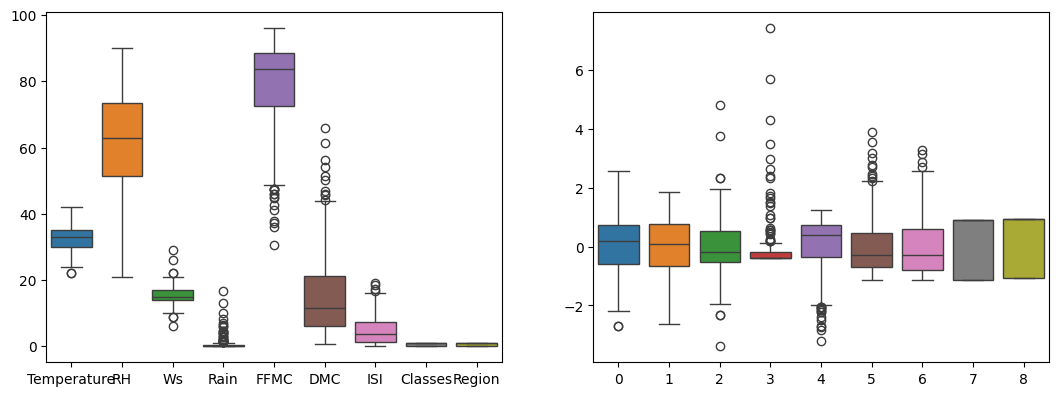

In [23]:
# Visualization of Outliers
# subplot
plt.figure(figsize=(20,10))
plt.subplot(2,3,1)
sns.boxplot(data=X_train)
plt.subplot(2,3,2)
sns.boxplot(data=X_train_scaled)



### Linear Regression

Mean Absolute Error:  0.744818663825644
R2 Score:  0.9746820210796544


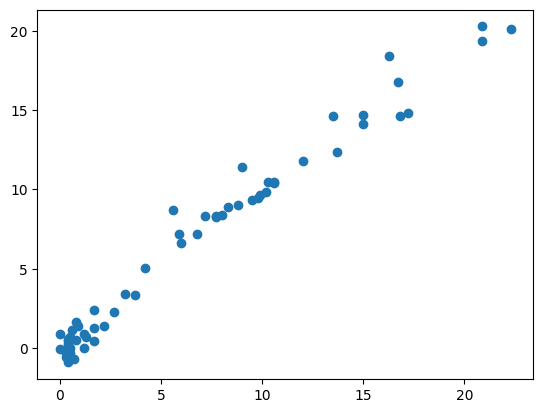

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
lr=LinearRegression()
lr.fit(X_train_scaled,Y_train)
ypred=lr.predict(X_test_scaled)
mae=mean_absolute_error(Y_test,ypred)
score=r2_score(Y_test,ypred)
print("Mean Absolute Error: ",mae)
print("R2 Score: ",score)
plt.scatter(Y_test,ypred)

### Lasso Regression

Mean Absolute Error:  1.0803986523800073
R2 Score:  0.9480976723132292


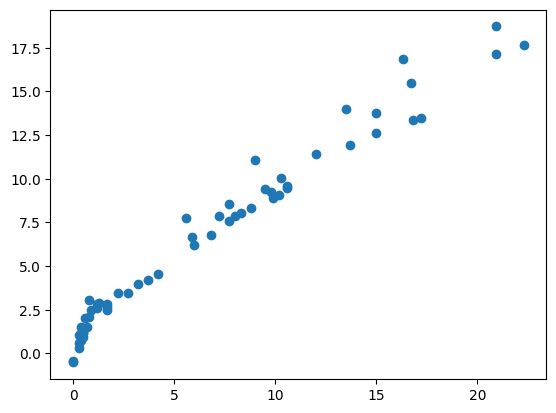

In [31]:
from sklearn.linear_model import Lasso
lasso=Lasso()
lasso.fit(X_train_scaled,Y_train)
ypred=lasso.predict(X_test_scaled)
mae=mean_absolute_error(Y_test,ypred)
score=r2_score(Y_test,ypred)
print("Mean Absolute Error: ",mae)
print("R2 Score: ",score)
plt.scatter(Y_test,ypred)


### Ridge Regression

Mean Absolute Error:  0.7455574876490524
R2 Score:  0.9743977609021641


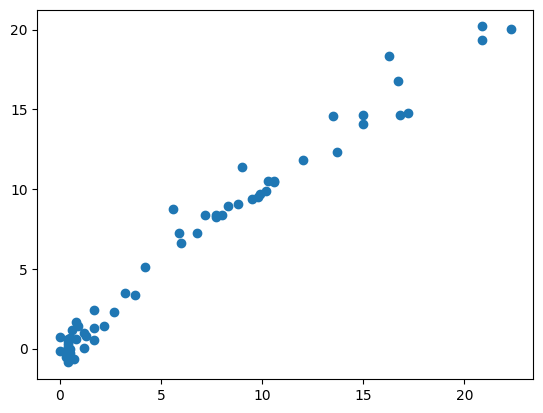

In [32]:
from sklearn.linear_model import Ridge
ridge=Ridge()
ridge.fit(X_train_scaled,Y_train)
ypred=ridge.predict(X_test_scaled)
mae=mean_absolute_error(Y_test,ypred)
score=r2_score(Y_test,ypred)
print("Mean Absolute Error: ",mae)
print("R2 Score: ",score)
plt.scatter(Y_test,ypred)


### ElasticNet

Mean Absolute Error:  1.6211444338397822
R2 Score:  0.8891169770114832


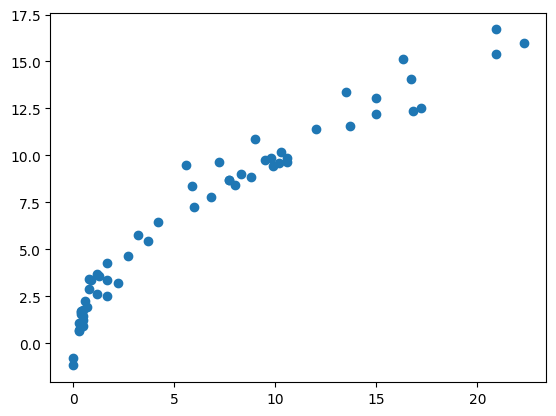

In [33]:
from sklearn.linear_model import ElasticNet
en=ElasticNet()
en.fit(X_train_scaled,Y_train)
ypred=en.predict(X_test_scaled)
mae=mean_absolute_error(Y_test,ypred)
score=r2_score(Y_test,ypred)
print("Mean Absolute Error: ",mae)
print("R2 Score: ",score)
plt.scatter(Y_test,ypred)


### HyperParameter Tuning

#### Cross Validation Lasso

In [37]:
from sklearn.linear_model import LassoCV
lassocv=LassoCV(cv=5)
lassocv.fit(X_train_scaled,Y_train)

LassoCV(cv=5)

In [38]:
lassocv.predict(X_test_scaled)

array([ 3.43918407,  1.16544482,  9.66779628,  9.44088641, 14.70626452,
        1.29952383,  2.37903475, -0.57484321,  8.14802231,  1.69602725,
        8.52487386,  1.6550118 ,  0.25634381, 11.86346517, 14.71631741,
       -0.14442765, 19.99592357, 10.41467444,  0.60657191,  8.76530326,
        5.01178108, -0.58696117, -0.54198844, 14.6550021 ,  0.46268886,
       20.27806899, -0.24416567,  6.58316141,  9.87492951,  0.78233296,
       11.59212402,  0.11608809, 14.84319739, 12.42936385, -0.28371487,
        2.51340365,  0.96205989,  0.530249  , 10.39389115,  0.38984329,
        9.0435784 ,  8.39053579, -0.41182948, 14.04820734,  7.19366   ,
        0.10129116,  1.31186324, 10.46806043,  0.66528505,  8.20006191,
        9.50246382,  3.5010383 , -0.09407128,  8.40759247, -0.06326468,
       19.34140921,  7.07337141, 18.40461705,  0.30150907, 16.73013863,
        0.97003665])

In [39]:
lassocv.alpha_

0.022920363247328407

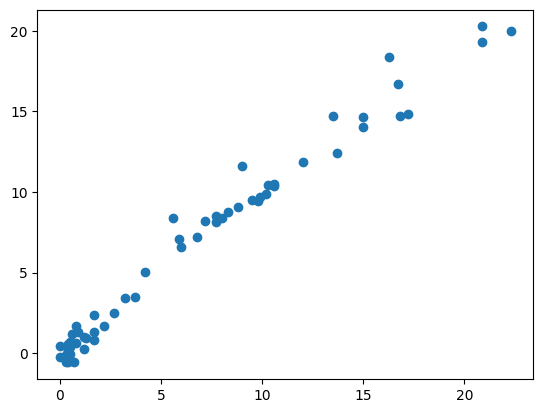

In [40]:
y_pred=lassocv.predict(X_test_scaled)
plt.scatter(Y_test,y_pred)

### Ridge Cross Validation

In [41]:
from sklearn.linear_model import RidgeCV
ridgecv=RidgeCV(cv=5)

Mean Absolute Error:  0.7455574876490524
R2 Score:  0.9743977609021641


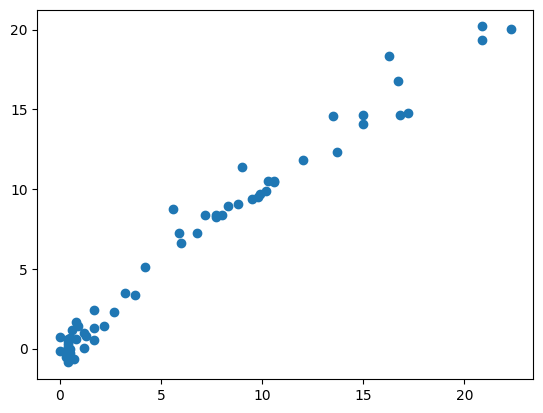

In [43]:
ridgecv.fit(X_train_scaled,Y_train)
y_pred=ridgecv.predict(X_test_scaled)
plt.scatter(Y_test,y_pred)
mae=mean_absolute_error(Y_test,y_pred)
score=r2_score(Y_test,y_pred)
print("Mean Absolute Error: ",mae)
print("R2 Score: ",score)



In [44]:
ridgecv.alpha_

1.0

#### Elastic Net CV

Mean Absolute Error:  0.7237239371323265
R2 Score:  0.9748695643484406


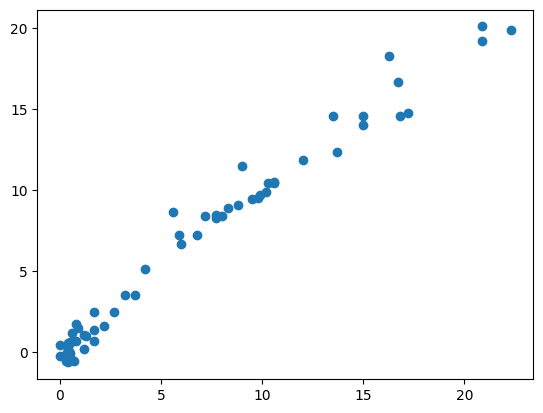

In [45]:
from sklearn.linear_model import ElasticNetCV
en=ElasticNetCV(cv=5)
en.fit(X_train_scaled,Y_train)
y_pred=en.predict(X_test_scaled)
plt.scatter(Y_test,y_pred)
mae=mean_absolute_error(Y_test,y_pred)
score=r2_score(Y_test,y_pred)
print("Mean Absolute Error: ",mae)
print("R2 Score: ",score)


In [46]:
en.alpha_

0.02281503759700101